In [69]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from scipy.stats import t

In [70]:
# t_score for sampling distributions

def t_score(sample_size, sample_mean, pop_mean, S):
    numerator = sample_mean - pop_mean
    denomenator = S / sample_size**0.5
    return numerator / denomenator

# Hypothesis Testing

Hypothesis testing in statistics is a way for you to test the results of a survey or experiment to see if you have meaningful results. You’re basically testing whether your results are valid by figuring out the odds that your results have happened by chance. If your results may have happened by chance, the experiment won’t be repeatable and so has little use.

Hypothesis testing can be one of the most confusing aspects for students, mostly because before you can even perform a test, you have to know what your null hypothesis is. Often, those tricky word problems that you are faced with can be difficult to decipher. But it’s easier than you think; all you need to do is:

Figure out your null hypothesis,
State your null hypothesis,
Choose what kind of test you need to perform,
Either support or reject the null hypothesis.


Step - 1:  
Alternate Hypothesis (Bold claim): $ H_1 \ \Rightarrow \ >, \ <, \ \neq  $  
Null Hypothesis (Status Quo): $ H_0 \ \Rightarrow \ \leq, \ \geq, \ = $

Step - 2:  
* Collect a sample of size n
* Compute the mean from this sample $ \bar{x} $

Step - 3:
Compute Test Statistic:  
* If population variance is known $$ z = \frac{\bar{x} - \mu}{\sigma/\sqrt[2]{n}}$$

* If population variance is unknown $$ t = \frac{\bar{x} - \mu}{s/\sqrt[2]{n}} $$

Step - 4:
Decide significance level $ \alpha $. Lower $ \alpha $ means you need stronger evidence to reject Null Hypothesis.

Step - 5.1: Apply decision rule:
* If test statistic is z-score -
    * Two tailed z-test: $$ |z| > z_\frac{\alpha}{2} \Rightarrow Accept \ H_1 \ or \ Reject \ H_0$$
    * Right tailed z-test: $$ z > z_\alpha \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$
    * Left tailed z-test: $$ z < -z_\alpha \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$
    
* If test statistic is t-score
    * Two tailed t-test: $$ |t| > t_{n-1,\frac{\alpha}{2}} \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$
    * Right tailed t-test: $$ t > t_{n-1,\alpha} \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$
    * Left tailed t-test: $$ t < t_{n-1,\alpha} \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$

Step - 5.2: Compute p-value $ P(Test \ Statistics | H_0) $
* For two tailed test: $$ p \ value = 2 * (1.0 - cdf(test \ statistic)) $$
* For one tailed test: $$ p \ value = (1.0 - cdf(test \ statistic)) $$
Now, $$ if (p \ value < \alpha) \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$

# Questions

<b>Q-1: Pista House selling Hyderabadi Chicken Dum biryani claims that each parcel packet has 500 grams of biryani (also mentioned on the label of packet). You are sceptic of their claims and believe that on average each packet does not contain 500 grams of biryani. How do you prove your claim? </b>


Step - 1:  
Alternate Hypothesis (Bold claim): $$ H_1: \mu \neq 500\  $$
Null Hypothesis (Status Quo): $$ H_0: \mu=500\ $$

Step - 2:  
* Collect a sample of size n = 10 $$ [490, 220, 470, 500, 495, 496, 496, 498, 508, 480] $$
* Compute sample mean $$ \bar{x} \ = \ ? $$

Step - 3:
Compute Test Statistic: $$ z = \frac{\bar{x} - \mu}{S/\sqrt[2]{n}}$$

Step - 4:
Decide $ \alpha $ or significance level

Step - 5.1: two tailed t-test: $$ reject \ H_0 \ if \ ? $$

Step - 5.2: Compute p-value


In [96]:
l = [490, 220, 470, 500, 495, 496, 496, 498, 508, 480]

mean=sum(l)/len(l)

In [97]:
# Two Tail - Calculating the z-critical value

confidence_level = 0.95

alpha = 1 - confidence_level

t_critical = t.ppf(q=1-(alpha)/2,df=sum(l)-1)

print(t_critical)

1.9604740615126262


In [98]:
# Defining the sample and population parameters

sample_size = len(l)
sample_mean = mean
pop_mean = 500
S= np.std(l)

In [99]:
# Calculating the t-score

ts = t_score(sample_size, sample_mean, pop_mean, S)

print(ts)

-1.3318197242863192


Text(465.3, 0.0007, 'x_bar')

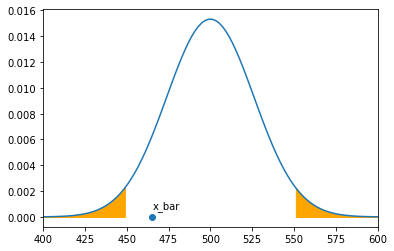

In [100]:
# Ploting the sampling distribution with rejection regions

# Defining the x minimum and x maximum
x_min = 400
x_max = 600


# Defining the sampling distribution mean and sampling distribution std
mean = pop_mean
std = S / sample_size**0.5


# Ploting the graph and setting the x limits
x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean, std)
plt.xlim(x_min, x_max)
plt.plot(x, y)


# Computing the left and right critical values (Two tailed Test)
t_critical_left = pop_mean + (-t_critical * std)
t_critical_right = pop_mean + (t_critical * std)


# Shading the left rejection region
x1 = np.linspace(x_min, t_critical_left, 100)
y1 = norm.pdf(x1, mean, std)
plt.fill_between(x1, y1, color='orange')


# Shading the right rejection region
x2 = np.linspace(t_critical_right, x_max, 100)
y2 = norm.pdf(x2, mean, std)
plt.fill_between(x2, y2, color='orange')


# Ploting the sample mean and concluding the results 
plt.scatter(sample_mean, 0)
plt.annotate("x_bar", (sample_mean, 0.0007))


# In this case sample mean falls in the rejection region
# i.e. here we reject the Null Hypothesis

In [101]:
# Conclusion using z test

if(np.abs(ts) > t_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Fail to reject Null Hypothesis


In [102]:
# Conclusion using p test

p_value = 2 * (1.0 - norm.cdf(np.abs(ts)))

print("p_value = ", p_value)

if(p_value < alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

p_value =  0.18291943486353945
Fail to reject Null Hypothesis


<b>Q-2: You have developed a new Natural Language Processing Algorithms and done a user study. You claim that the average rating given by the users is greater than 4 on a scale of 1 to 5. How do you prove this to your client? </b>

Step - 1:  
Alternate Hypothesis (Bold Claim): $$ H_1:\mu>4 \  $$
Null Hypothesis (Status Quo): $$ H_0: \mu \leq4 $$

Step - 2:  
* Collect a sample of size n = 10 $$ [4, 3, 5, 4, 5, 3, 5, 5, 4, 2, 4, 5, 5, 4, 4, 5, 4, 5, 4, 5] $$
* Compute sample mean $$ \bar{x} \ = \ ? $$

Step - 3:
Compute Test Statistic: $$ z = \frac{\bar{x} - \mu}{S/\sqrt[2]{n}}$$

Step - 4:
Decide $ \alpha $

Step - 5.1: one tailed t-test: $$ reject \ H_0 \ if ? $$

Step - 5.2: Compute p-value



In [115]:
# One Tail - Calculating the t-critical value

data= [4,3,5,4,5,3,5,5,4,2,4,5,5,4,4,5,4,5,4,5]

confidence_level = 0.95

alpha = 1 - confidence_level

t_critical = t.ppf(q=1-alpha,df=len(data)-1) #one tailed t score for 95% Confidence Level

print(t_critical)

1.729132811521367


In [116]:
# Defining the sample and population parameters

sample_size = 20
sample_mean = 4.25
pop_mean = 4
S=np.std(data)


In [117]:
# Calculating the z-score

ts = t_score(sample_size, sample_mean, pop_mean, S)

print(ts)

1.3483997249264843


Text(4.25, 0.1, 'x_bar')

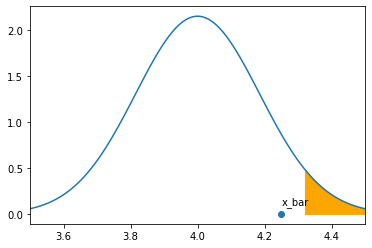

In [118]:
# Ploting the sampling distribution with rejection regions

# Defining the x minimum and x maximum
x_min = 3.5
x_max = 4.5


# Defining the sampling distribution mean and sampling distribution std
mean = pop_mean
std = S / (sample_size**0.5)


# Ploting the graph and setting the x limits
x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean, std)
plt.xlim(x_min, x_max)
plt.plot(x, y)


# Computing the right critical value (Right tailed Test)
t_critical_right = pop_mean + (t_critical * std)


# Shading the right rejection region
x1 = np.linspace(t_critical_right, x_max, 100)
y1 = norm.pdf(x1, mean, std)
plt.fill_between(x1, y1, color='orange')


# Ploting the sample mean and concluding the results 
plt.scatter(sample_mean, 0)
plt.annotate("x_bar", (sample_mean, 0.1))

# In this case sample mean falls in the rejection region
# i.e. Reject the Null Hypothesis

In [119]:
# Conclusion using z test

if(ts > t_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Fail to reject Null Hypothesis


In [123]:
# Conclusion using p test

p_value = 1.0 - norm.cdf(np.abs(ts))

print("p_value = ", p_value)

if(p_value < alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

p_value =  0.08876492620607679
Fail to reject Null Hypothesis


<b>Q-3: TATA has developed a better fuel management system for the SUV segment. They claim that with this system, on average the SUV's mileage is at least 15 km/litre? </b>

Step - 1:  
Alternate Hypothesis (Bold Claim): $$ H_1: \mu>15  $$
Null Hypothesis (Status Quo): $$ H_0:  \mu\leq15   $$

Step - 2:  
* Collect a sample of size n = 10 $$ [14.08, 14.13, 15.65, 13.78, 16.26, 14.97, 15.36, 15.81, 14.53, 16.79, 15.78, 16.98, 13.23, 15.43, 15.46, 13.88, 14.31, 14.41, 15.76, 15.38] $$
* Compute sample mean $$ \bar{x} \ = \ ? $$

Step - 3:
Compute Test Statistic: $$ z = \frac{\bar{x} - \mu}{S/\sqrt[2]{n}}$$

Step - 4:
Decide $ \alpha $

Step - 5.1: one tailed t-test: $$ reject \ H_0 \ if \ ? $$

Step - 5.2: Compute p-value

In [132]:
# One Tail - Calculating the t-critical value

data=[14.08,14.13,15.65,13.78,16.26,14.97,15.36,15.81,14.53,16.79,15.78,16.98,13.23,15.43,15.46,13.88,14.31,14.41,15.76,15.38]

confidence_level = 0.95

alpha = 1 - confidence_level

t_critical = t.ppf(q=1-alpha,df=len(data)-1) #one tailed t score for 95% Confidence Level

print(t_critical)

1.729132811521367


In [133]:
sample_size = 20
sample_mean = 15.1
pop_mean = 15
S = np.std(data)

In [134]:
ts = t_score(sample_size, sample_mean, pop_mean, S)

print(ts)

0.44748014931892083


Text(15.1, 0.1, 'x_bar')

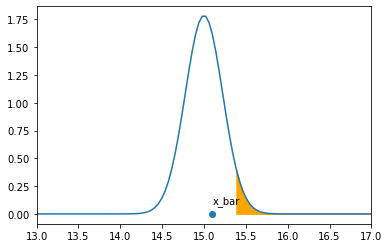

In [135]:
x_min = 13
x_max = 17

mean = pop_mean
std = S / (sample_size**0.5)

x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean, std)

plt.xlim(x_min, x_max)
# plt.ylim(0, 0.03)

plt.plot(x, y)

t_critical_right = pop_mean + (t_critical * std)

x1 = np.linspace(t_critical_right, x_max, 100)
y1 = norm.pdf(x1, mean, std)
plt.fill_between(x1, y1, color='orange')

plt.scatter(sample_mean, 0)
plt.annotate("x_bar", (sample_mean, 0.1))

# In this case sample mean falls in the acceptance region
# i.e. Fail to Reject the Null Hypothesis

In [136]:
if(ts > t_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Fail to reject Null Hypothesis


In [137]:
p_value = 1.0 - norm.cdf(np.abs(ts))

print("p_value = ", p_value)

if(p_value < alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

p_value =  0.32726420870663564
Fail to reject Null Hypothesis


<b>Q-4: You have developed a new Machine Learning Application and claim that on average it takes less than 100 ms to predict for any future datapoint. How do you convince your client about this claim? (Based on past data you know that the std is 10 ms)</b>

Step - 1:  
Alternate Hypothesis (Bold Claim): $$ H_1: \mu <100ms $$
Null Hypothesis (Status Quo): $$ H_0: \mu \geq 100ms $$

Step - 2:  
* Collect a sample of size n = 100
* Compute sample mean $$ \bar{x} \ = \ 97.5 $$

Step - 3:
Compute Test Statistic: $$ z = \frac{\bar{x} - \mu}{S/\sqrt[2]{n}}$$

Step - 4:
Decide $ \alpha $

Step - 5.1: one tailed z-test: $$ reject \ H_0 \ if \ ? $$

Step - 5.2: Compute p-value

In [138]:
# One Tail - Calculating the t-critical value


confidence_level = 0.95

alpha = 1 - confidence_level

t_critical = t.ppf(q=1-alpha,df=99) #one tailed t score for 95% Confidence Level

print(t_critical)

1.6603911559963895


In [149]:
sample_size = 100
sample_mean = 97.5
pop_mean = 100
S = 7

In [150]:
ts = t_score(sample_size, sample_mean, pop_mean, S)

print(z)

-1.3318197242863192


Text(97.5, 0.02, 'x_bar')

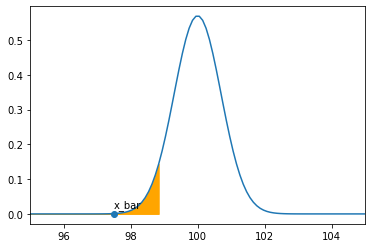

In [151]:
x_min = 95
x_max = 105

mean = pop_mean
std = S / (sample_size**0.5)

x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean, std)

plt.xlim(x_min, x_max)
# plt.ylim(0, 0.03)

plt.plot(x, y)

t_critical_left = pop_mean + (-t_critical * std)

x1 = np.linspace(x_min, t_critical_left, 100)
y1 = norm.pdf(x1, mean, std)
plt.fill_between(x1, y1, color='orange')

plt.scatter(sample_mean, 0)
plt.annotate("x_bar", (sample_mean, 0.02))

# In this case sample mean falls in the rejection region

# i.e. Reject Null Hypothesis

In [152]:
if(ts < -t_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Reject Null Hypothesis


In [153]:
p_value = 1.0 - norm.cdf(np.abs(ts))

print("p_value = ", p_value)

if(p_value < 0.01):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

p_value =  0.00017751969037349546
Reject Null Hypothesis
